# ACCENTURE Virtual Internship Task 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_df.csv', index_col = 0)
df.head()

,Content ID,Content Type,Category,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-04-09 02:46:20,negative,0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2021-06-17 12:22:51,negative,10
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,dislike,2020-11-09 02:49:59,negative,10


In [3]:
df1 = df.groupby('Category').agg({'Score' : 'sum'}).sort_values(by = 'Score', ascending = False)
df1

,Score
Category,
Animals,74965
Science,71168
Healthy eating,69339
Technology,68738
Food,66676
Culture,66579
Travel,64880
Cooking,64756
Soccer,57783


Text(0, 0.5, 'Score')

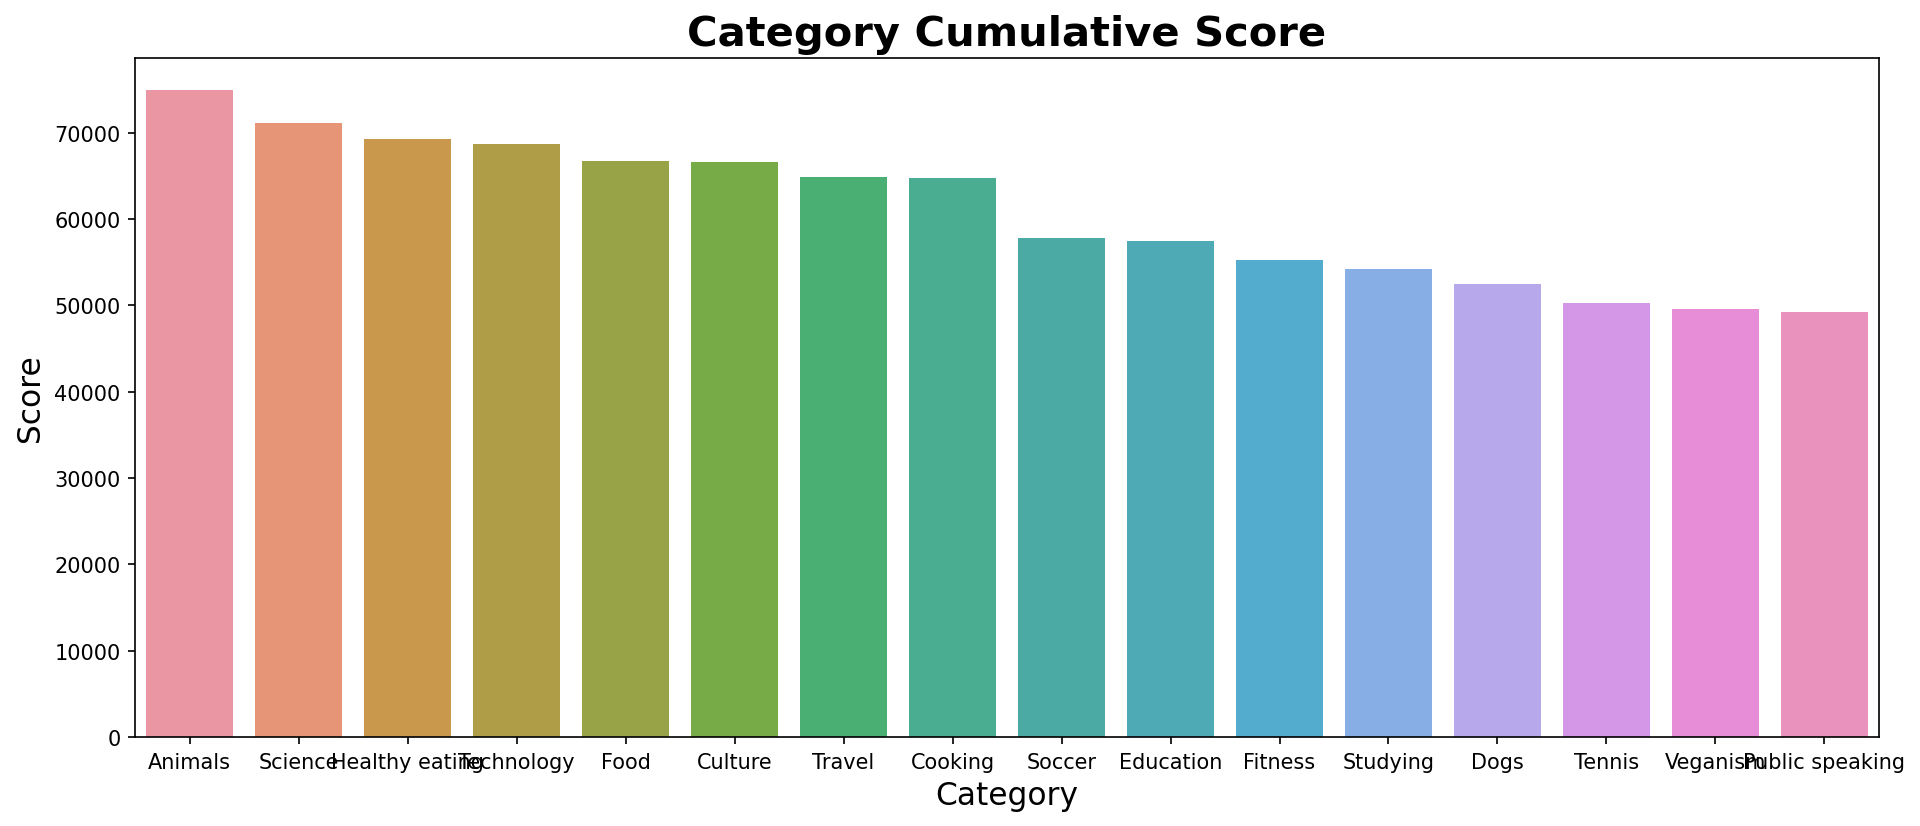

In [4]:
plt.figure(figsize=(15,6), dpi = 150)
sns.barplot(x = df1.index, y = 'Score', data = df1)
plt.title('Category Cumulative Score', fontsize = 20, weight = 'extra bold')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Score', fontsize = 15)

In [5]:
# Changing it to a respective date format
df['Datetime'] = pd.to_datetime(df['Datetime'] ,infer_datetime_format=True)
df['Datetime']

0       2020-11-07 09:43:50
1       2021-01-06 19:13:01
2       2021-04-09 02:46:20
3       2021-06-17 12:22:51
4       2020-11-09 02:49:59
                ...        
24568   2021-04-09 08:05:56
24569   2021-02-16 17:17:02
24570   2020-10-31 04:50:14
24571   2020-11-04 20:08:31
24572   2021-06-07 03:55:33
Name: Datetime, Length: 24573, dtype: datetime64[ns]

In [6]:
df2 = df.copy()
df2["Month"] = df2["Datetime"].dt.month
df2.head(2)

,Content ID,Content Type,Category,Type,Datetime,Sentiment,Score,Month
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0,11
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0,1


In [7]:
df2 = df2.groupby('Month').agg({'Content Type' : 'count'}).sort_values(by = 'Content Type', ascending = False)
df2

,Content Type
Month,
5,2138
1,2126
8,2114
12,2092
7,2070
10,2056
11,2034
9,2022
6,2021


<BarContainer object of 12 artists>

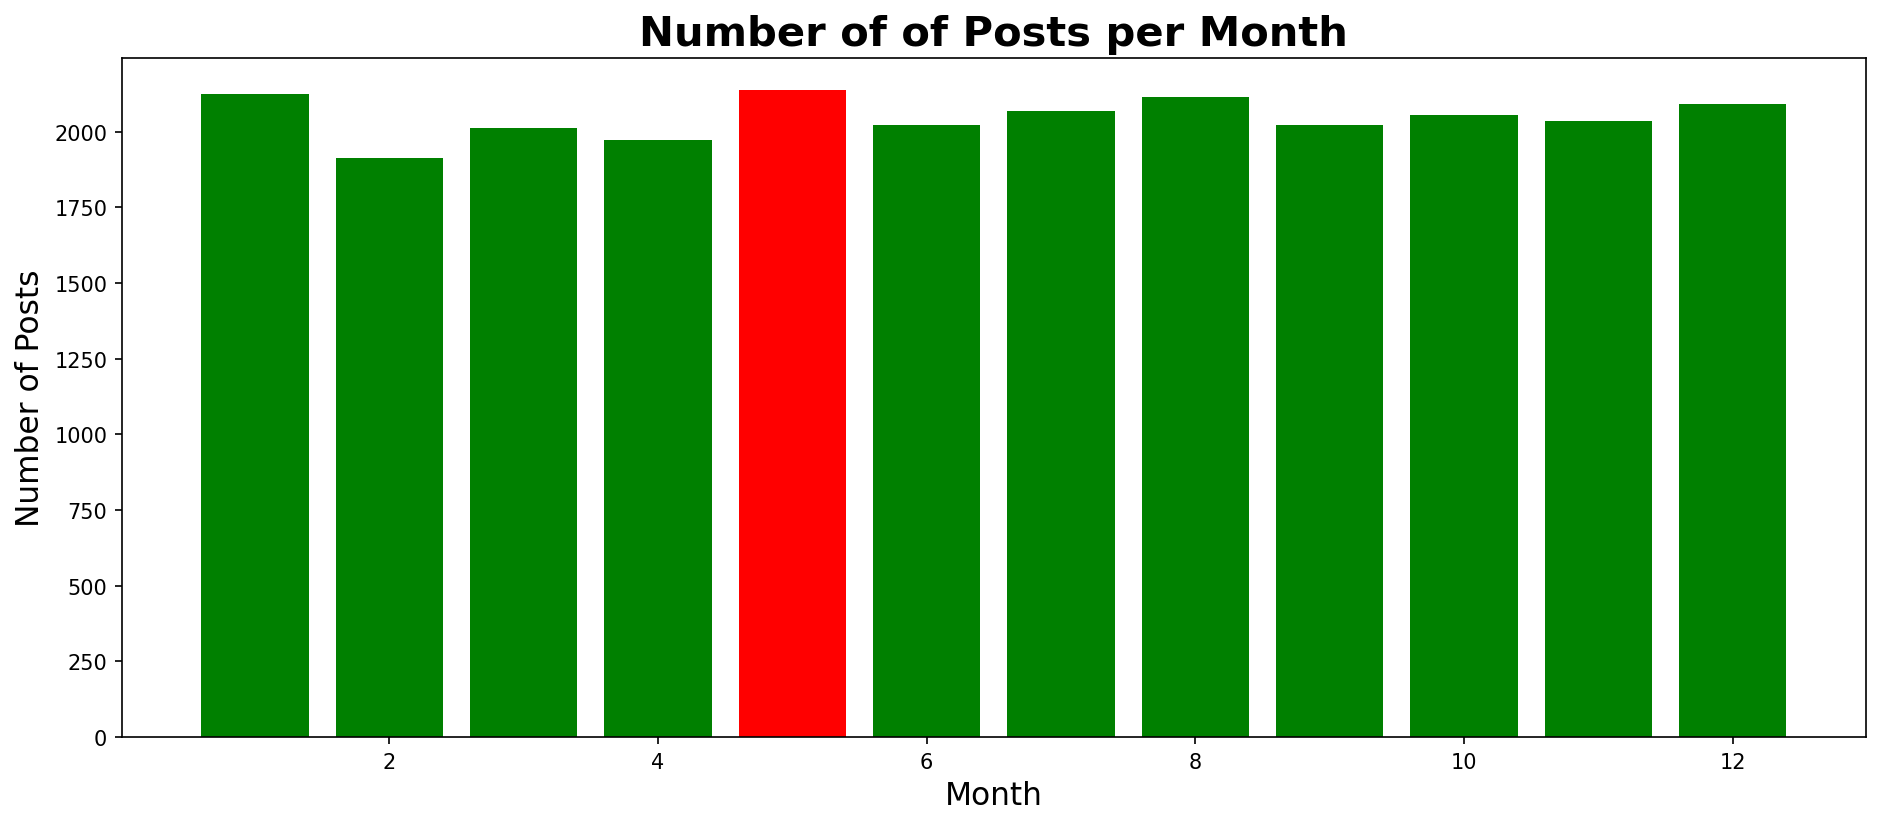

In [24]:
plt.figure(figsize = (15,6), dpi = 150)
x = df2.index
y = df2['Content Type']
pal = ["green" if (i != 5) else "red" for i in x]
plt.title('Number of of Posts per Month', fontsize = 20, weight = 'extra bold')
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Number of Posts', fontsize = 15)
plt.bar(x, y, color = pal)

In [9]:
df3 = df.groupby('Content Type').agg({'Content ID' : 'count'})
df3

,Content ID
Content Type,
GIF,6079
audio,5660
photo,6589
video,6245


<BarContainer object of 4 artists>

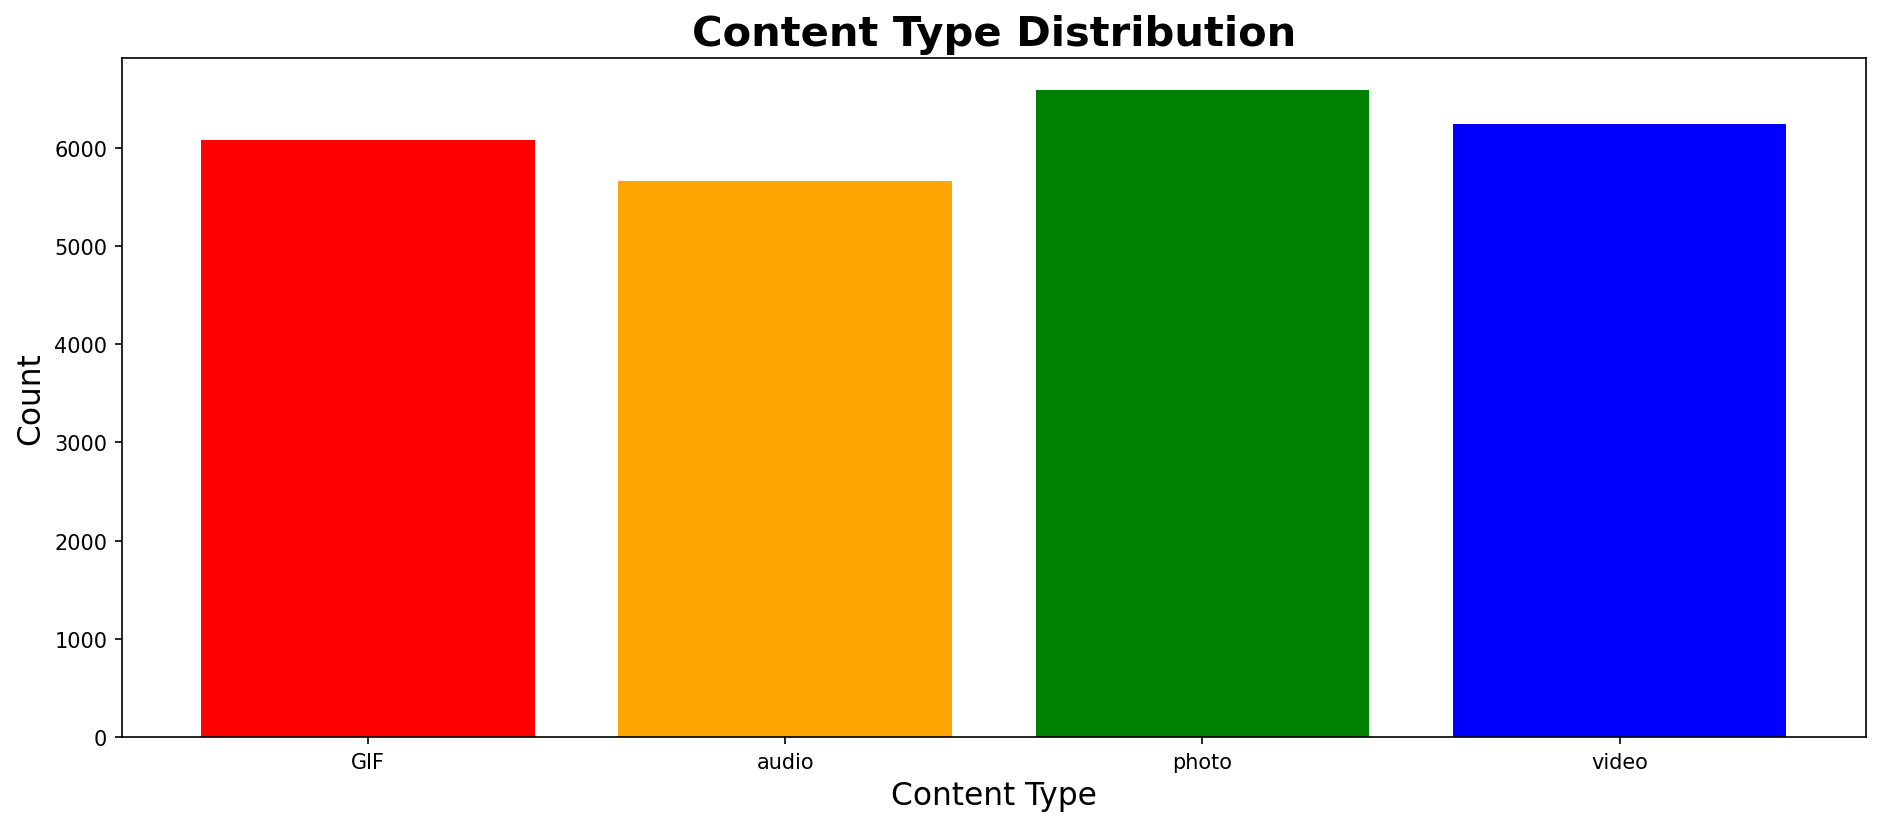

In [10]:
plt.figure(figsize = (15,6), dpi = 150)
pal = ['red', 'orange', 'green', 'blue']
x = df3.index
y = df3['Content ID']
plt.title('Content Type Distribution', fontsize = 20, weight='extra bold')
plt.ylabel('Count', fontsize = 15)
plt.xlabel('Content Type', fontsize = 15)
plt.bar(x, y, color = pal)

In [11]:
df3 = df.copy()
df3["Hours"] = df3["Datetime"].dt.hour
df3.head(2)

,Content ID,Content Type,Category,Type,Datetime,Sentiment,Score,Hours
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2020-11-07 09:43:50,negative,0,9
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying,disgust,2021-01-06 19:13:01,negative,0,19


In [12]:
pos = df3[df3['Sentiment']=='positive']
pos = pos.groupby('Category')['Hours'].count().reset_index().sort_values(by='Hours',ascending=False).reset_index(drop=True).head(10)
pos

,Category,Hours
0,Animals,1050
1,Science,1015
2,Healthy eating,985
3,Technology,974
4,Culture,943
5,Food,943
6,Cooking,932
7,Travel,918
8,Soccer,817
9,Education,815


Text(0, 0.5, 'Total Hours')

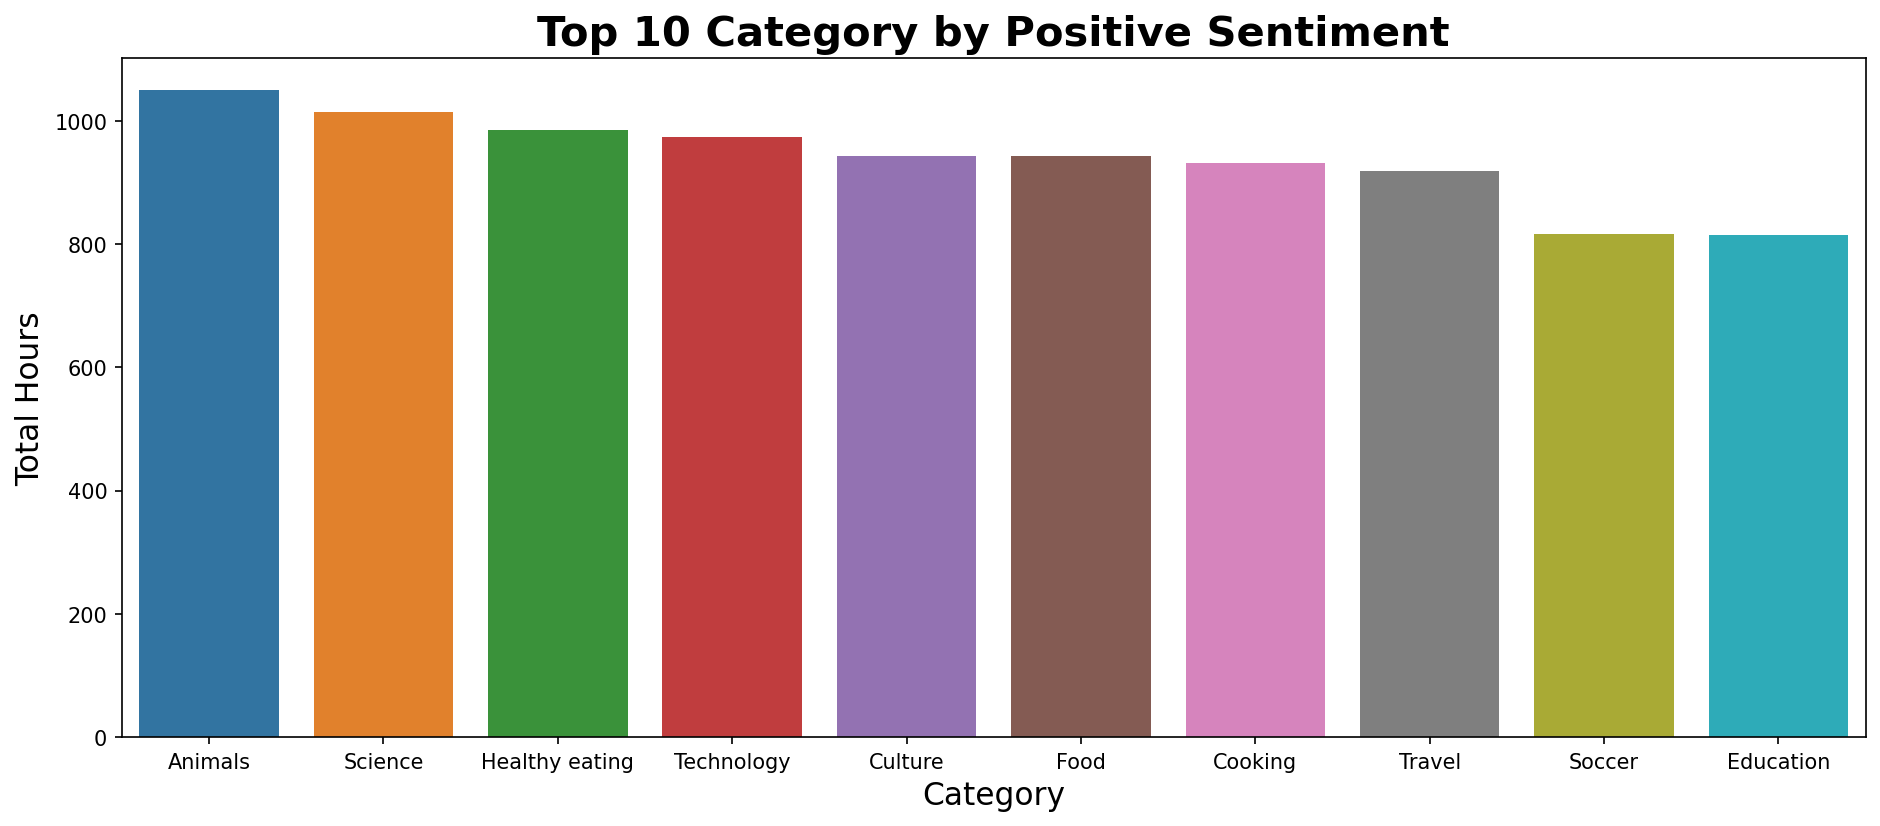

In [13]:
plt.figure(figsize=(15,6), dpi = 150)
sns.barplot(x = 'Category', y = 'Hours', data = pos)
plt.title('Top 10 Category by Positive Sentiment', fontsize = 20, weight = 'extra bold')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Total Hours', fontsize = 15)

In [14]:
neg = df3[df3['Sentiment']=='negative']
neg = neg.groupby('Category')['Hours'].count().reset_index().sort_values(by='Hours',ascending=False).reset_index(drop=True).head(10)
neg

,Category,Hours
0,Animals,618
1,Cooking,550
2,Science,547
3,Food,544
4,Travel,533
5,Culture,523
6,Healthy eating,520
7,Technology,510
8,Tennis,450
9,Fitness,441


Text(0, 0.5, 'Total Hours')

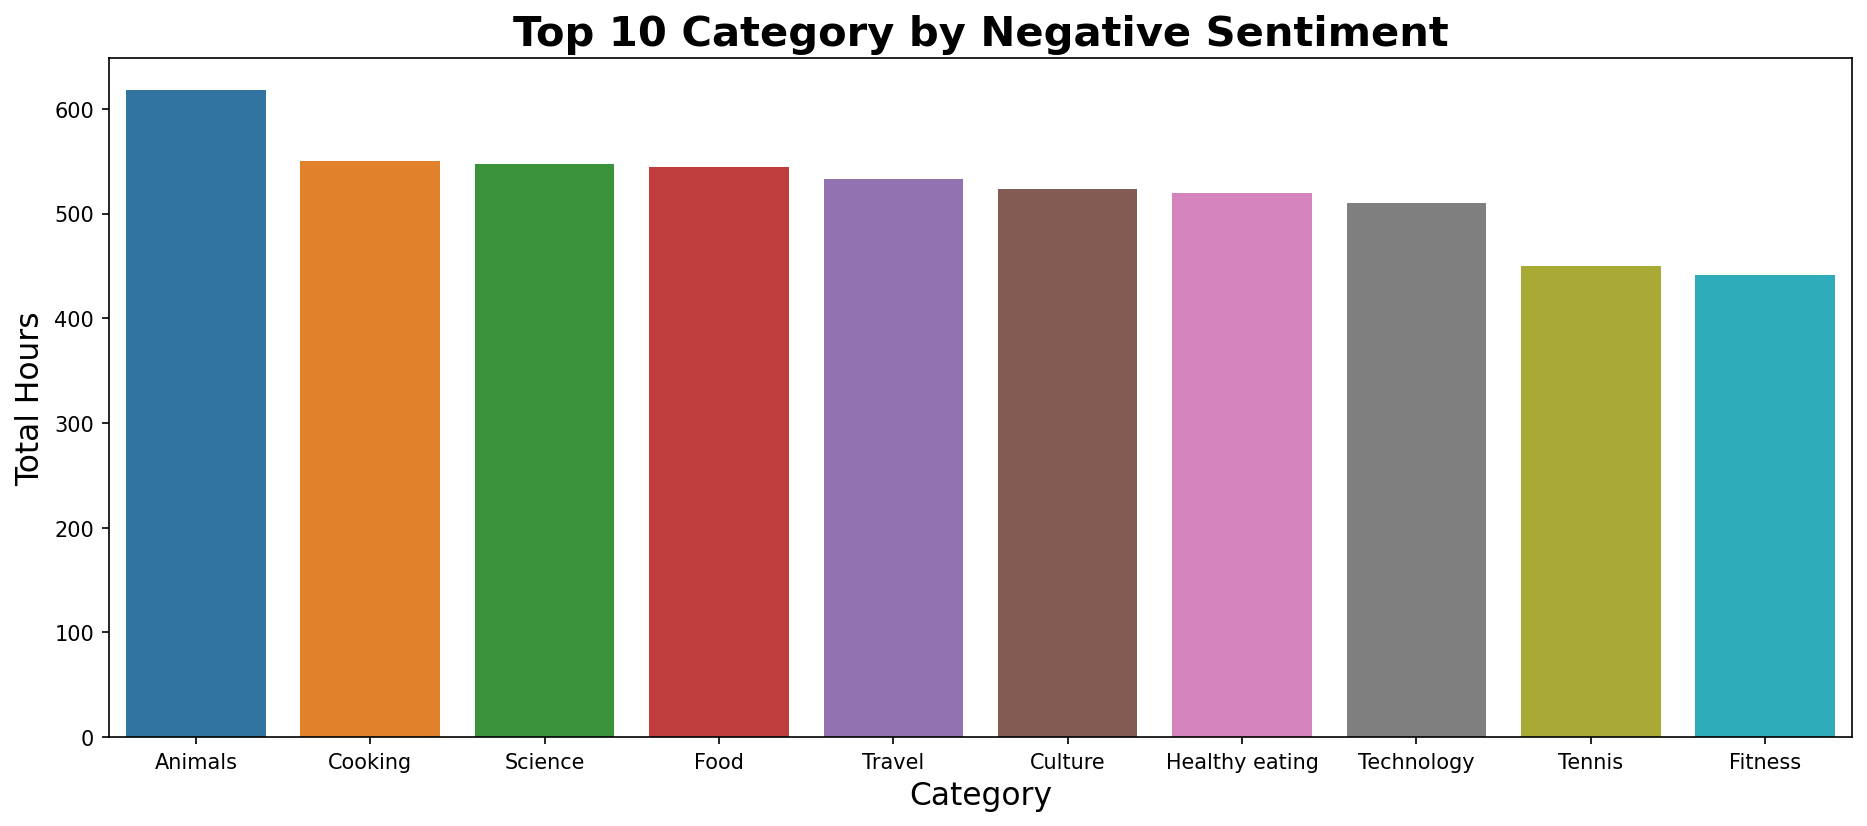

In [15]:
plt.figure(figsize=(15,6), dpi = 150)
sns.barplot(x = 'Category', y = 'Hours', data = neg)
plt.title('Top 10 Category by Negative Sentiment', fontsize = 20, weight = 'extra bold')
plt.xlabel('Category', fontsize = 15)
plt.ylabel('Total Hours', fontsize = 15)